<a href="https://colab.research.google.com/github/sdaitzman/DSA2020/blob/master/Midterm_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSA Practice Programming Lab
The goal of this lab is to review the concepts seen in class so far, and to use some of the tools not already implemented for homework. This will be a good starting point to prepare for the midterm exam so make notes of any questions/areas that you find more difficult. 

The first few questions were taken from Cracking the Coding Interview, 6th edition. 

Test edit!

## Question 1: 
Given a short string $s1$ and a long string $s2$, write a function that counts how many permutations of $s1$ are found in $s2$. Also, give the runtime analysis (should be O($n1*n2$) where $n1$ is the length of $s1$ and $n2$ is the length of $s2$). This is roughly linear in $n2$ if $n1$ is small. 

Example: Your function should return three permutations for $s1$ = 'ab', $s2$ = 'baba' (starting at indices 0, 1, 2) and one permutation for $s1$ = 'cake' and $s2$ = 'cacke' (starting at index 1).

In [0]:
def permutations(s1, s2):
  '''
  Counts permutations of string s1 in string s2
  '''
  count = 0 # the counter
  d1 = {}   # dict of string 1
  d2 = {}   # dict of string 2

  # Build initial counter dicts from s1 and s2
  for i in range(len(s1)):
    if s1[i] in d1.keys(): # build dict 1
      d1[s1[i]] += 1
    else:
      d1[s1[i]] = 1
    if s2[i] in d2.keys(): # build dict 2
      d2[s2[i]] += 1
    else: 
      d2[s2[i]] = 1
  
  for i in range(len(s2) - len(s1)):
    # iterate through s2
    # skip the part we already have in d2
    
    # the subset of s2 is a permutation!
    if d1 == d2: count += 1

    # shrink or remove the d2 key we're stripping
    if d2[s2[i]] == 1:
      del d2[s2[i]]
    else:
      d2[s2[i]] -= 1

    # grow or create the d2 key to include the new char
    pos = i+len(s1)
    if s2[pos] in d2.keys():
      d2[s2[pos]] += 1
    else: 
      d2[s2[pos]] = 1

  # check if the last subset of s2 is a permutation!
  if d1 == d2: count += 1
  return count

s1 = 'ab'
s2 = 'bababa'
print(permutations(s1, s2), " for ", s1, " and ", s2)

s1 = 'cake'
s2 = 'cacke'
print(permutations(s1, s2), " for ", s1, " and ", s2)

s1 = 'cake'
s2 = 'cakecake'
print(permutations(s1, s2), " for ", s1, " and ", s2)

s1 = 'egg'
s2 = 'eggegg'
print(permutations(s1, s2), " for ", s1, " and ", s2)

5  for  ab  and  bababa
1  for  cake  and  cacke
5  for  cake  and  cakecake
4  for  egg  and  eggegg


## Question 2: 
 Given two strings, write a function to check if they are one edit (or zero edits) away. For the purposes of this question, a single edit refers to either inserting a character, deleting a character, or replacing a character.

Example: Your function should return True for "lake" and "bake" (one edit) but False for "lake" and "ace" (two edits).

In [0]:
def strcmp(s1, s2):
  ret = None
  L1 = len(s1)
  L2 = len(s2)

  # case 1: length difference >1
  if abs(L1 - L2) > 1: return False
  
  # case 2: strings equal
  if s1 == s2: return True

  # case 3: length equal
  if L1 == L2:
    count = 0
    
    for i in range(L1):
      if s1[i] != s2[i]:
        count += 1
        if count > 1: return False
  return True

  # case 4: length different == 1
  count = 0
  short = s1 if len(s1)<len(s2) else s2
  long  = s2 if len(s1)<len(s2) else s1

  if short[0] == long[0]:
      for i in range(L1):
          if s1[i] != s2[i]:
                count += 1
          if count > 1: return False
  if short[0] == long[1]:
      for i in range(len(L1)-1):
          if s1[i] != s2[i+1]:
              count += 1
          if count > 1: return False




  return True

s1 = 'kale'
s2 = 'skale'
strcmp(s1, s2)


True


## Question 3: 
Write a function that takes in two lists $l1$ and $l2$ and returns whether $l2$ is a rotation of $l1$ in $O(n1+n2)$ time, where $n1$ is the length of $l1$ and $n2$ is the length of $l2$. 

Example: Your function should return True for $11 = [h,e,l,l,o]$, $l2 = [e,l,l,o,h]$.

> This one is wacky and Nick says he's asking Alice and will update someone on our team with the answer. He thought that working for most common strings would be a reasonable approach. The runtime requirement is no longer needed.

In [0]:
def rotated(s1, s2):

  if len(s1) != len(s2): return False

  indices = [i for i, x in enumerate(s2) if x == s1[0]]
  for i in indices:
    for j in range(len(s1)):
      pos = i + j if i+j<len(s1) else i+j-len(s1)
      if s1[j] != s2[pos]: return False
  return True

s1 = list('hello')
s2 = list('elloh')
rotated(s1, s2)

s1 = list('world')
s2 = list('dworl')
rotated(s1, s2)

s1 = list('aaaaaaaaaaaaaaaaaaaa')
s2 = list('aaaaaaaaaaaaaaaaaaaa')
rotated(s1, s2)

s1 = list('aaaaaaaaaaaaaaaaaaaawws')
s2 = list('aaaaaaaaaaaaaaaaaaaawww')
rotated(s1, s2)

False


## Question 4: 
Given a list $l$ that is a rotation of a sorted list, write a function that returns the index with the minimum element in O($log n$), where $n$ is the length of $l$.

Example: Your function should return 3 for $l = [4.5, 6, 8.2, 0, 1.3, 1.4]$.

> Binary search

In [0]:
def minRotation(l, start=0):
  # if we're in the base case, time to return with a list comprehension
  # finds the index of the minimum element in the remaining 3 items
  # this is O(1) because the length of the list is now 4
  if len(l) <= 4:
    return [i for i in range(len(l)) if l[i] == min(l)][0]

  i2 = int(len(l)/2)

  el1 = l[0]
  el2 = l[i2]
  el3 = l[-1]

  # case 1: break in left half
  if el2 < el1: return minRotation(l[0:i2+1], start)

  # case 2: break in right half
  if el3 < el2: return minRotation(l[i2:-1], start + i2)

  # case 3: rotation is 0
  if el1 < el2 <= el3 or el1 <= el2 < el3: return 0

  # case 4 (edge case): split points are equal
  if el1 == el2 == el3:
    first_half_mindex = minRotation(l[0:i2+1], start)
    next_half_mindex = minRotation(l[i2:-1], i2 + start)

    return first_half_mindex + start if l[first_half_mindex] < l[next_half_mindex] \
    else next_half_mindex + start

  return None

l = [4.5,6,8.2,0,1.3,1.4]
print(l, ': ', minRotation(l))

l = [4,5,6,-3,0,1]
print(l, ': ', minRotation(l))

l = [4,5,6,7,8]
print(l, ': ', minRotation(l))

l = [4,4,0,1,4,4,4,4,4]
print(l, ': ', minRotation(l))

l = [4,4,4,4,4,4,4,4,4,4,4,0,1,4,4,4,4,4]
print(l, ': ', minRotation(l))

[4.5, 6, 8.2, 0, 1.3, 1.4] :  3
[4, 5, 6, -3, 0, 1] :  3
[4, 5, 6, 7, 8] :  0
[4, 4, 0, 1, 4, 4, 4, 4, 4] :  2
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 4, 4, 4, 4, 4] :  11


## Question 5: 
Implement Merge Sort using the doubly linked list class you implemented for homework 2. Your algorithm should not have to copy any nodes when recursing (but may have to update O(1) pointer values). 

> Merge sort with a DLL

## Question 6: 

### Don't do this one
Write a recursive function that returns the total possible number of ways to give exact change for $x$ dollars given a set number of twenty dollar bills, ten dollar bills, five dollar bills, one dollar bills, quarters, dimes, and nickels available. Note that the order of change doesn't matter: 2 nickels and 1 dime is equivalent to 1 dime and 2 nickels. Your runtime should be O($x$). **Hint:** You may want to pass in two lists to your function - one of the different bill/coin values and one with how many there are left of each.  

Example: If $x = 0.50$ and we have two quarters, one dime, and 10 nickels available, there are five possibilities - find them. 

# Challenges 
Pick at least one of the following challenges. I recommend the first one if you'd like to practice divide-and-conquer algorithms.

## Challenge 1 - Skyline Problem
Given a list of buildings including their positions and heights, find the skyline visible using a divide-and-conquer approach. See image below for a skyline example. First, you should think about how you will represent a building and how you will represent the outputted skyline. You may assume all buildings are rectangular (what a boring city). 

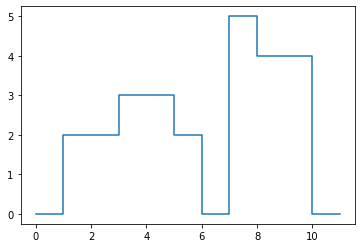

In [0]:
import matplotlib.pyplot as plt
plt.step([i for i in range(12)], [0,0,2,2,3,3,2,0,5,4,4,0])

## Challenge 2 - Minesweeper
Design an object class to represent the game of minesweeper. Think about how the way you represent the game will impact the runtime of updating the grid. You may also want to allow the user to start a game with different difficulty levels. 

If you want to add some funk, think about how you can change the structure or elements of the game (maybe the landscape isn't a grid? are there fun surprises to uncover?)